<a href="https://colab.research.google.com/github/usama1123456789/AIEYEGUIDE_FYP1/blob/main/FYP1_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Nov 25 09:56:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:

import os
from IPython.display import display, Image
from IPython import display


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# After running this cell, you'll be prompted to authorize the notebook to access your Google Drive.


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/Dataset_1/dataset1.zip'
extraction_path = '/content/drive/MyDrive/dataset-1/'  # Change this to your desired extraction path

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/dataset-1/data.yaml epochs=20 imgsz=640


100% 49.7M/49.7M [00:00<00:00, 293MB/s]
Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/dataset-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

In [ ]:
!yolo export model=/content/runs/detect/train/weights/best.pt format=torchscript

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (49.6 MB)

TorchScript: starting export with torch 2.1.0+cu118...
TorchScript: export success ✅ 8.1s, saved as '/content/runs/detect/train/weights/best.torchscript' (99.1 MB)

Export complete (12.4s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.torchscript imgsz=640 data=/content/drive/MyDrive/dataset-1/data.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


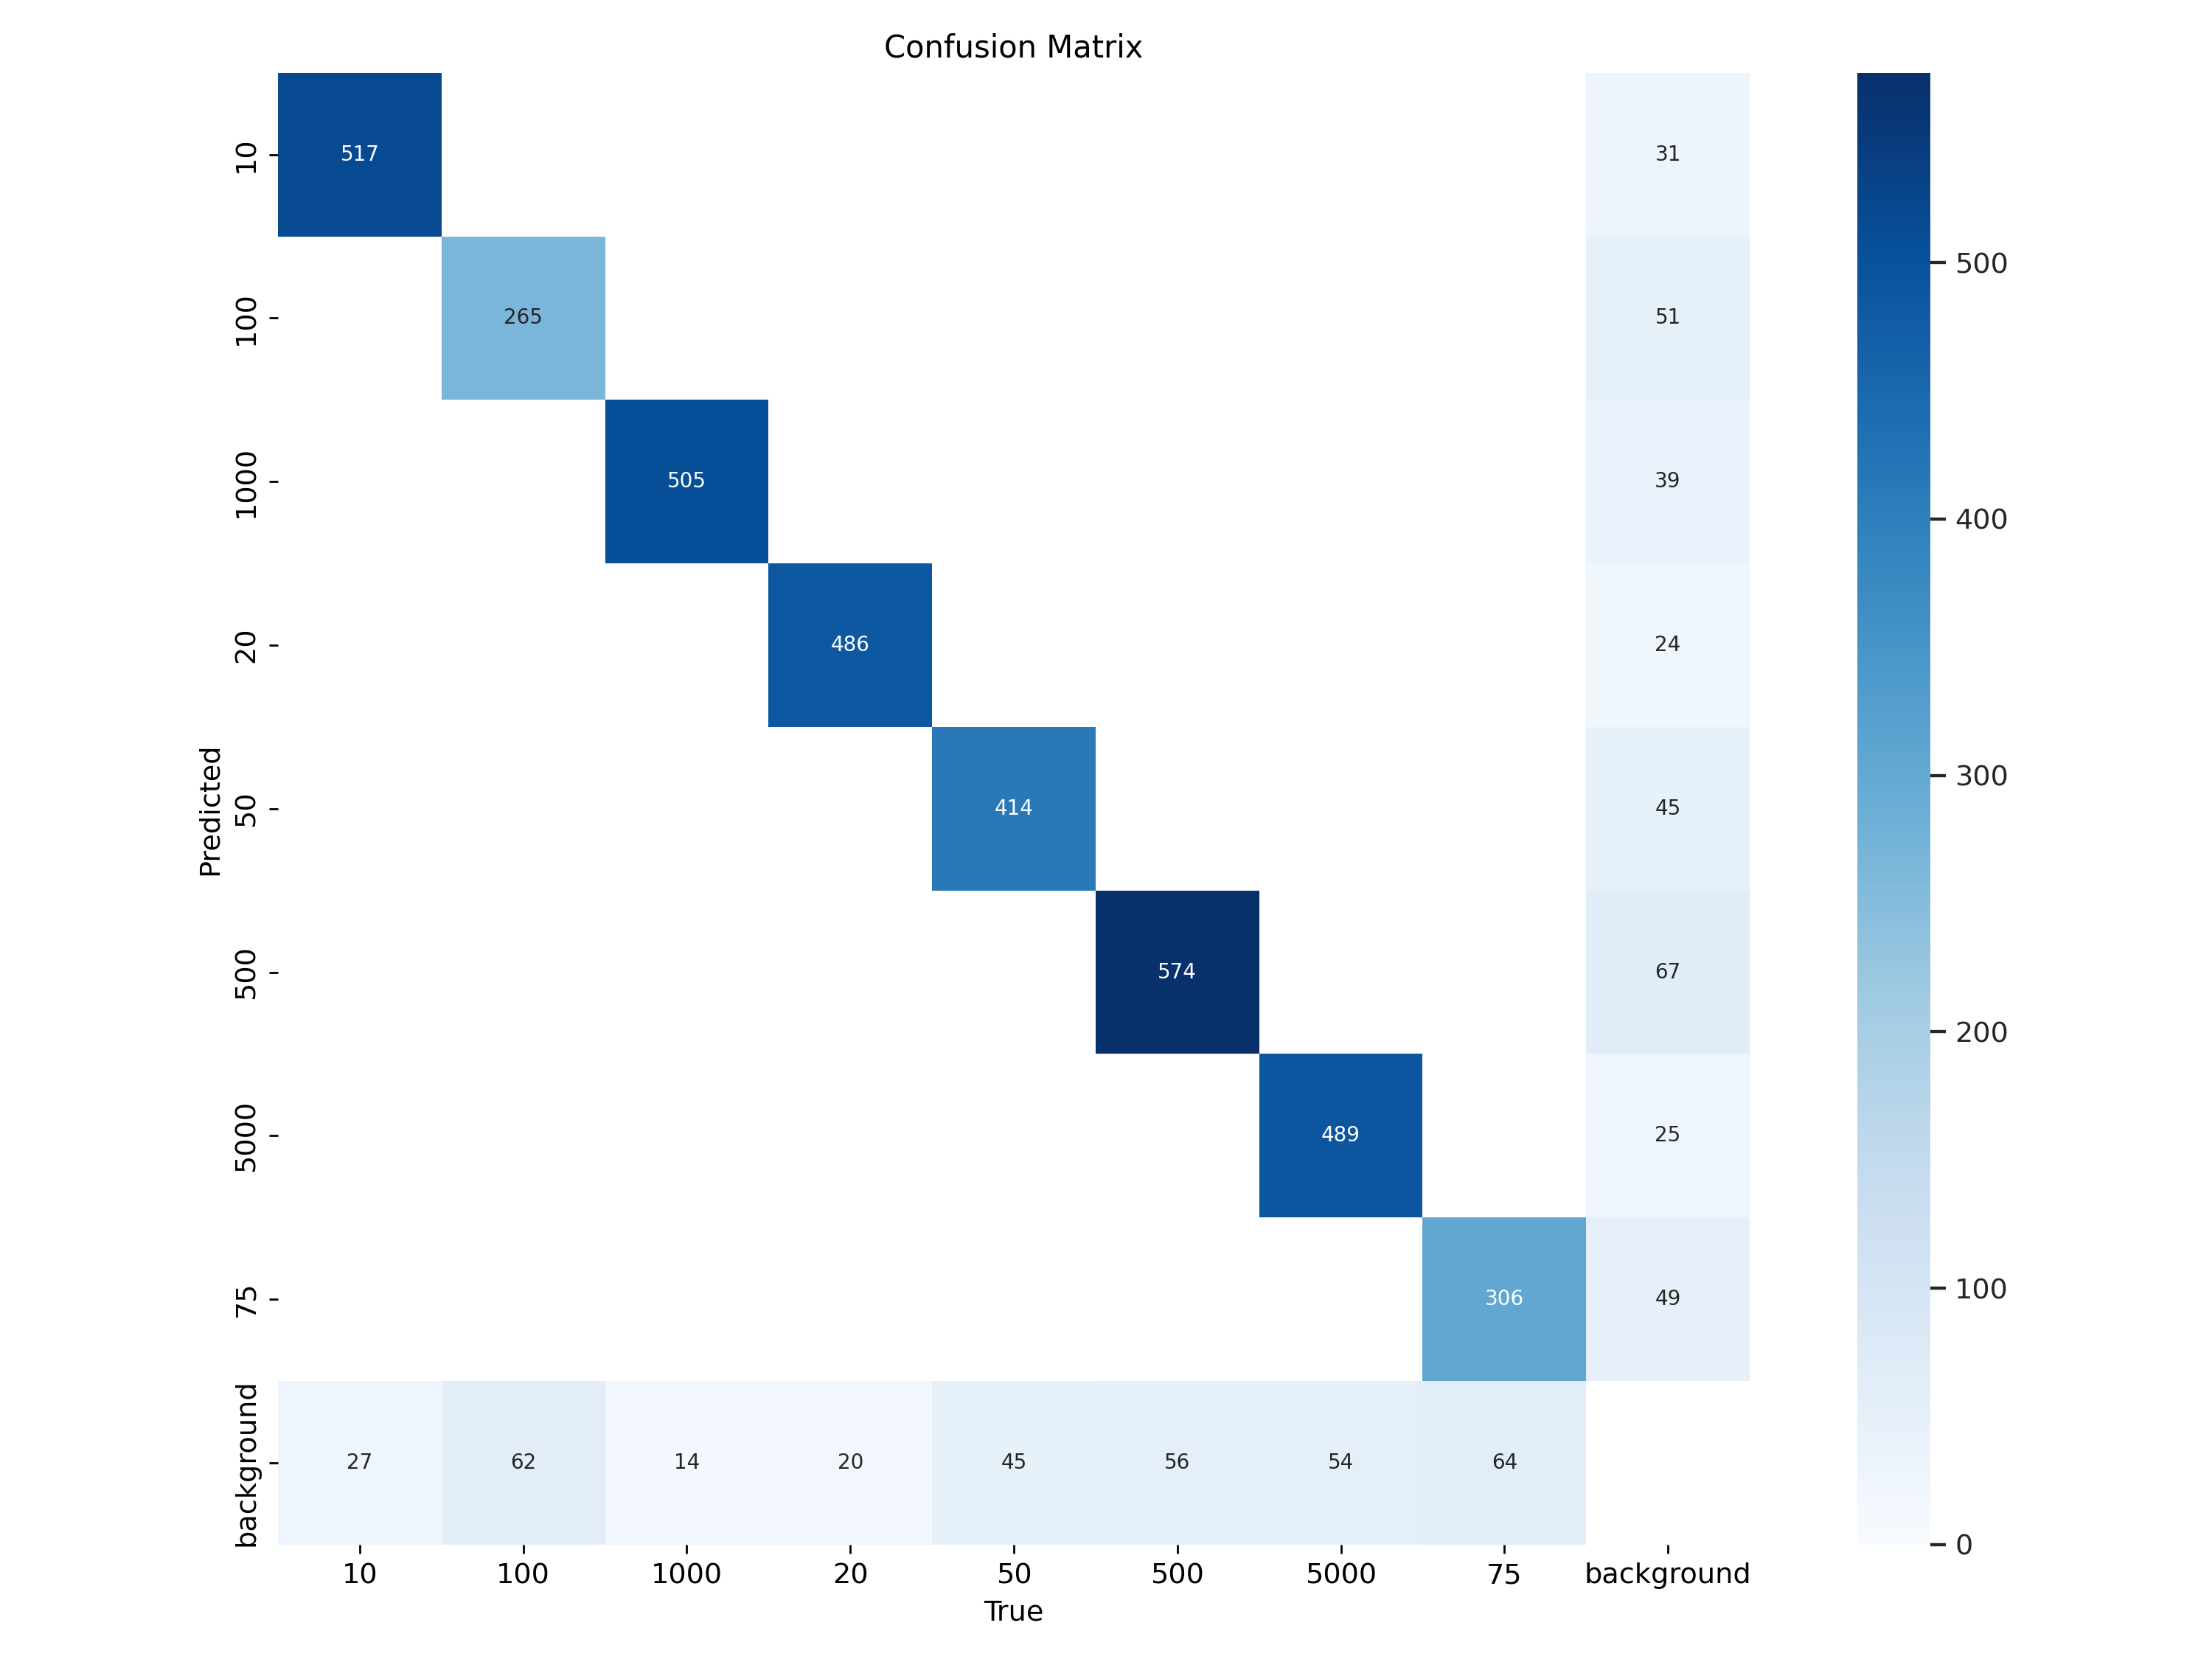

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

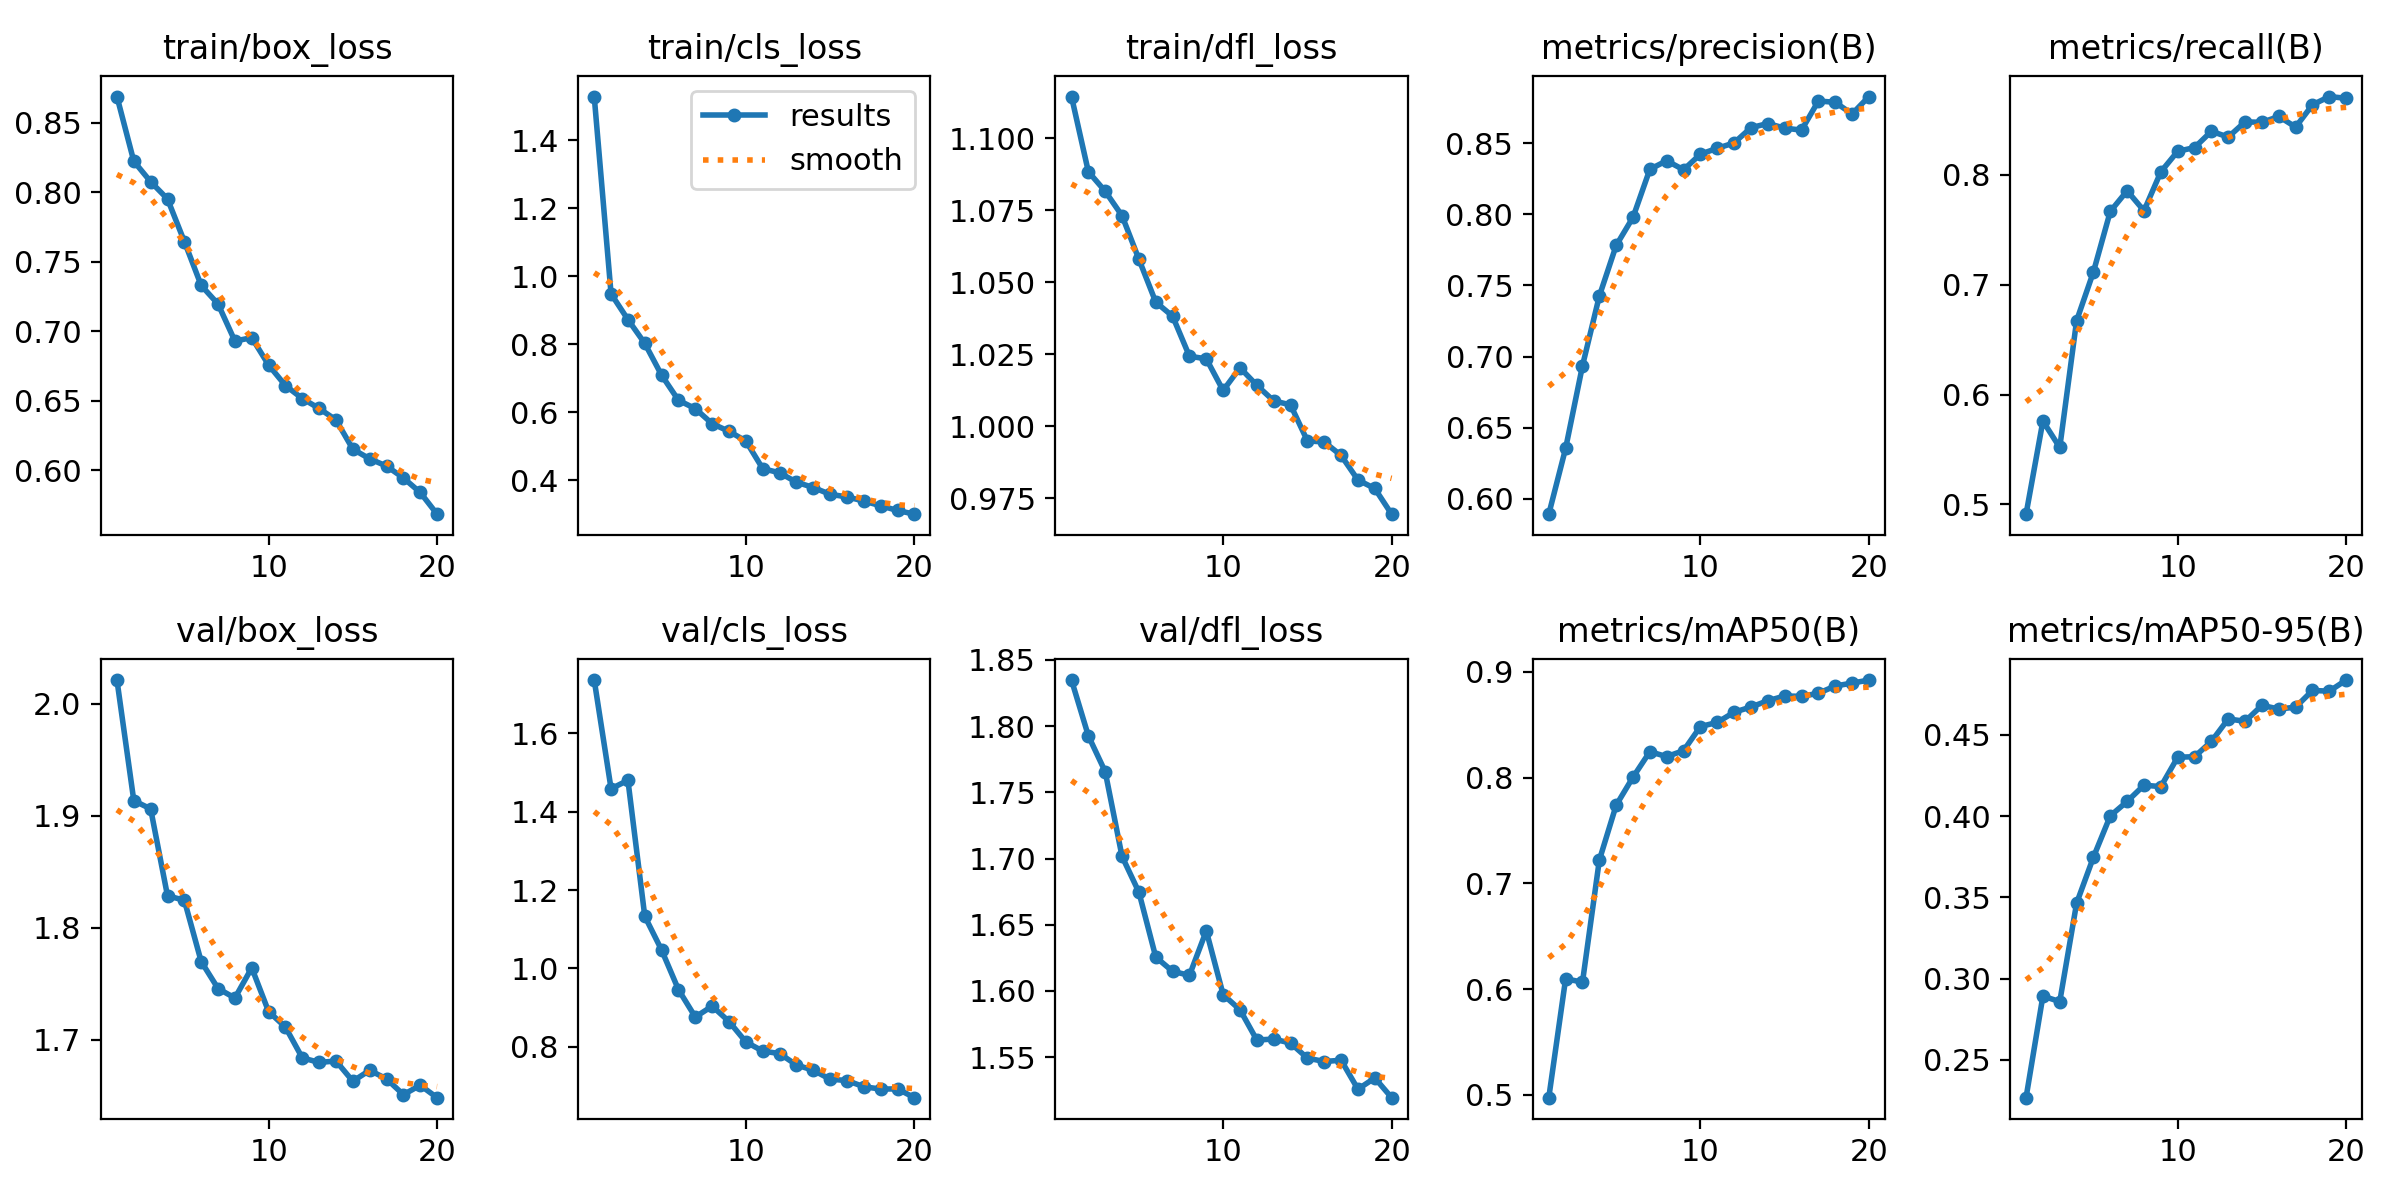

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/dataset-1/data.yaml

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/dataset-1/valid/labels.cache... 802 images, 0 backgrounds, 0 corrupt: 100% 802/802 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 51/51 [00:25<00:00,  2.03it/s]
                   all        802       3898      0.883      0.869      0.893      0.484
                    10        802        544      0.952      0.919      0.972      0.566
                   100        802        327      0.787      0.722      0.775      0.286
                  1000        802        519      0.932      0.972      0.979      0.643
                    20        802        506      0.949      0.951      0.976      0.619
                    50        802        459      0.852      0.894      0.864      0.541
                   500        802 

In [1]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/drive/MyDrive/dataset-1/test/images/download.jpg save_txt=true save_conf=true


/bin/bash: line 1: yolo: command not found


In [2]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/10_jpg.rf.fb47beada7ff81676c2d7f3f3e8d784e.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
